In [1]:
######## Test!!!!

In [1]:
import numpy as np,\
pandas as pd,\
seaborn as sns,\
matplotlib.pyplot as plt,\
sklearn.preprocessing as Scaler

import sklearn

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

In [3]:
features_to_drop = ['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF']
features_to_trans = ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
                     'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
                     'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
                     'BsmtFinSF1', 'WoodDeckSF', '1stFlrSF',
                     'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'HalfBath']
features_categorical = ['LotShape', 'OverallQual', 'OverallCond', 'LandContour', 'YearBuilt', 'Utilities', 'LotConfig',
                        'YearRemodAdd', 'GarageFinish', 'MoSold', 'GarageQual', 'YrSold', 'GarageCond', 'PavedDrive',
                        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSZoning', 'MSSubClass',
                        'Street', 'Alley', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                        'GarageType', 'GarageYrBlt']
features_numerical = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
                      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
features_not_label_encode = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt','GarageYrBlt']

In [4]:
# Join training and test dataframes for easy preprocessing
#
######################################
Y = train_data[['Id', 'SalePrice']]
all_data = pd.concat((train_data.drop(columns = ['SalePrice']), test_data))

In [5]:
# Get and Split N/A faetures
#
######################################
features_na = (all_data.isnull() == True).sum().sort_values(ascending = False)
features_na = features_na[features_na > 0].index
features_na_num = [x for x in features_na if x in features_numerical]
features_na_cat = [x for x in features_na if x in features_categorical]

In [6]:
# Fill NA
#
######################################
all_data = all_data.drop(columns = features_to_drop)

all_data['MSZoning'].fillna('RL')
all_data['Functional'].fillna('Typ')
all_data['Utilities'].fillna('AllPub')
all_data['Electrical'].fillna('SBrkr')
all_data['SaleType'].fillna('WD')
all_data['KitchenQual'].fillna('TA')
all_data['Exterior1st'].fillna('VinylSd')
all_data['Exterior2nd'].fillna('VinylSd')

all_data[features_not_label_encode] = all_data[features_not_label_encode].fillna(0)

all_data[features_na_cat] = all_data[features_na_cat].fillna("None")

all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda col: 
                                                                                    col.fillna(col.dropna().median()))

all_data[features_na_num] = all_data[features_na_num].fillna(0)


In [7]:
# Log Transformation
#
#######################################
Y['SalePrice'] = np.log1p(Y['SalePrice'])

all_data[features_to_trans] = np.log1p(all_data[features_to_trans])

In [8]:
all_data.shape

(2919, 77)

In [67]:
# label encode features
#
##################################
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in cols:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(list(all_data[col].values))
    all_data[col] = le.transform(list(all_data[col].values))

In [103]:
all_data.shape

(2919, 77)

In [104]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorc

In [9]:
###### assign dummy variable
#
#######################################

all_data_dum = pd.get_dummies(all_data.drop('Id', axis = 1))

In [10]:
all_data_dum.shape

(2919, 307)

In [11]:
print(all_data_dum.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_New', 'SaleType_None', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=307)


In [12]:
# Convert Fake numerical Features to strings
# 
#######################################
# all_data_dum[['OverallQual', 'OverallCond', 'YearBuilt', 'MSSubClass']] = all_data_dum[
#     ['OverallQual', 'OverallCond', 'YearBuilt', 'MSSubClass']].astype(str)

In [13]:
# Randomise data
# 
all_data_dum = all_data_dum.sample(frac = 1).reset_index(drop = True)

In [14]:
# get training_data
#
###################
training_data = all_data_dum[:len(train_data)]

In [15]:
def rmsError(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)) / len(x))

In [16]:
from sklearn import linear_model

In [17]:
training_set = training_data[ : -400]
Y_training_set = Y['SalePrice'][ : -400]
cv_set = training_data[-400 : ]
Y_cv_set = Y['SalePrice'][-400 : ]

Linear regression

In [18]:
# test 1 : no regression, intercept calculation, no normalization
#
######################
test_model_1 = sklearn.linear_model.LinearRegression(copy_X = True, normalize = False)
test_model_1.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_1.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_1.predict(cv_set)))

training error =	 0.3622073785857164
cv error =		 0.43752540207660645


In [115]:
# test 3 : no regression, intercept calculation, normalization
#
######################
test_model_3 = sklearn.linear_model.LinearRegression(copy_X = True, normalize = True)
test_model_3.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_3.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_3.predict(cv_set)))

training error =	 0.36027226380280963
cv error =		 2164481128751.8142


In [116]:
# test 2 : no regression, no intercept calculation, no normalization
#
######################
test_model_2 = sklearn.linear_model.LinearRegression(copy_X = True, fit_intercept=False)
test_model_2.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_2.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_2.predict(cv_set)))

training error =	 0.3601399449902741
cv error =		 0.48838198562002516


Ridge regression

In [117]:
# Test 4 : 
#
############################
test_model_4 = sklearn.linear_model.Ridge(copy_X = True, fit_intercept = True, alpha = 110, tol = 0.000000001, max_iter = 10000000)
test_model_4.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_4.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_4.predict(cv_set)))

training error =	 0.388632676278908
cv error =		 0.3906191978804503


In [124]:
ar = []
ar2 = []
indices = []
for i in range(1, 2000, 20):
    alpha = i * .1
#     alpha = (alpha * 1000) / 1000
    test_model_41 = sklearn.linear_model.Ridge(copy_X = True, fit_intercept = False, alpha = alpha, max_iter = 1000)
    test_model_41.fit(training_set, Y_training_set)
    ar.append(rmsError(test_model_41.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_41.predict(cv_set)))
    indices.append(str(alpha)[:5])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

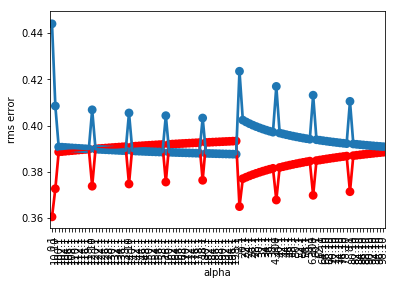

In [126]:
fig = sns.pointplot(indices, ar, color = 'red', legend = True)
fig = sns.pointplot(indices, ar2)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
plt.xticks(rotation = 90)
#fig.get_figure().savefig('../images/ridge_alpha.png')

In [127]:
test_model_42 = sklearn.linear_model.RidgeCV(fit_intercept = True, cv = 6, alphas = [1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 4, 10, 60, 100, 200])
test_model_42.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_42.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_42.predict(cv_set)))

training error =	 0.3926762235274348
cv error =		 0.3878056600263073


In [128]:
test_model_42.alpha_

200

In [128]:
ar = []
ar2 = []
indices = []
for i in range(100, len(training_set), 50):
#     alpha = i*.1
    test_model_43= sklearn.linear_model.Ridge(copy_X = True, fit_intercept = False, alpha = 2.4, max_iter = 10000000)
    test_model_43.fit(training_set[ : i], Y_training_set[ : i])
    ar.append(rmsError(test_model_43.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_43.predict(cv_set)))
    indices.append(i)

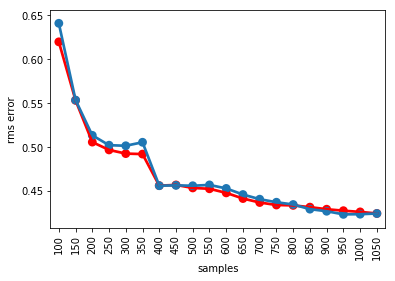

In [129]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'samples', ylabel = 'rms error')
# fig.get_figure().savefig( '../images/ridge_m.png', dpi = 1000)

In [131]:
# Lasso test
#
############################
test_model_5 = sklearn.linear_model.Lasso(copy_X = True, max_iter = 100000, fit_intercept = False, alpha = 0.03)
test_model_5.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_5.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_5.predict(cv_set)))
# print("alpha = ", test_model_5.alpha_)

training error =	 0.40599112886338273
cv error =		 0.38144205140805987


In [129]:
ar = []
ar2 = []
indices = []
for i in range(1, 2000, 100):
    alpha = i * .0001
#     alpha = (alpha * 1000) / 1000
    test_model_51 = sklearn.linear_model.Lasso(copy_X = True, fit_intercept = False, alpha = alpha, max_iter = 1000)
    test_model_51.fit(training_set, Y_training_set)
    ar.append(rmsError(test_model_51.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_51.predict(cv_set)))
    indices.append(str(alpha)[:6])

[Text(0,0.5,'rms error'), Text(0.5,0,'alpha')]

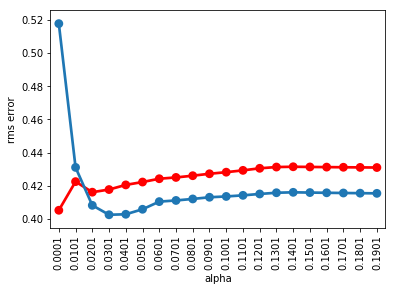

In [130]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
# fig.get_figure().savefig('../images/lasso_alpha.png', dpi = 1000)

In [134]:
ar = []
ar2 = []
indices = []
for i in range(100, len(training_set), 50):
#     alpha = i*.1
    test_model_53= sklearn.linear_model.Lasso(copy_X = True, fit_intercept = False, alpha = 0.0029, max_iter = 10000000)
    test_model_53.fit(training_set[ : i], Y_training_set[ : i])
    ar.append(rmsError(test_model_53.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_53.predict(cv_set)))
    indices.append(i)

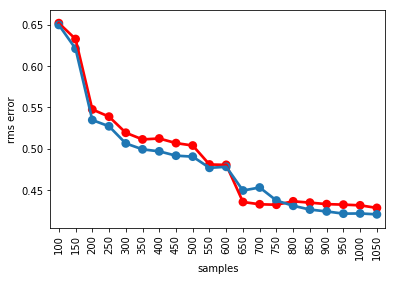

In [135]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'samples', ylabel = 'rms error')
fig.get_figure().savefig('../images/lasso_m.png', dpi = 500)

In [210]:
# Elastic Net
#
########################################
test_model_6 = sklearn.linear_model.ElasticNet(copy_X = True, fit_intercept = False, max_iter = 1000000, alpha = 0.1, l1_ratio = 0.12)
test_model_6.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_6.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_6.predict(cv_set))) 

training error =	 0.4671477246410791
cv error =		 0.4581912442461517


In [203]:
minar = []
ratios = []
for r in range(1, 200, 5):
#     print(r)
#     ratio = r * .01
    ratio = 0.10 + r * 0.001
    ar = []
    ar2 = []
    indices = []
    for i in range(1, 50000, 500):
        alpha = i * .0001
        test_model_61 = sklearn.linear_model.ElasticNet(copy_X = True, fit_intercept = False, alpha = alpha, l1_ratio = ratio)    
        test_model_61.fit(training_set, Y_training_set)
        ar.append(rmsError(test_model_61.predict(training_set), Y_training_set))
        ar2.append(rmsError(Y_cv_set, test_model_61.predict(cv_set)))
        indices.append(str(alpha)[:6])
    minar.append(np.min(ar2))
    ratios.append(str(ratio)[:4])

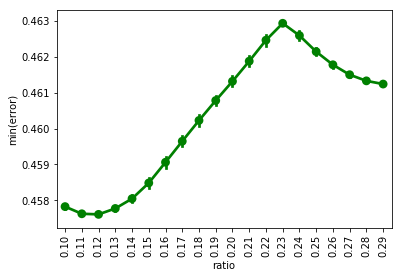

In [204]:
figg = sns.pointplot(x = ratios, y = minar, color = 'green')
plt.xticks(rotation = 90)
figg.set(xlabel = 'ratio', ylabel = 'min(error)')
# figg.get_figure().savefig('../images/elastic_ratio2.png', dpi = 500)

In [207]:
ar = []
ar2 = []
indices = []
for i in range(1, 2500, 100):
    alpha = i * .0001
    test_model_61 = sklearn.linear_model.ElasticNet(copy_X = True, fit_intercept = False, alpha = alpha, l1_ratio = 0.12)    
    test_model_61.fit(training_set, Y_training_set)
    ar.append(rmsError(test_model_61.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_61.predict(cv_set)))
    indices.append(str(alpha)[:6])

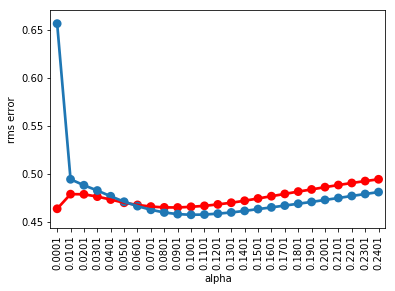

In [209]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
# fig.get_figure().savefig('../images/elastic_alpha.png', dpi = 500)
# print("min = ", np.min(ar2))

min =  0.4219056765028322


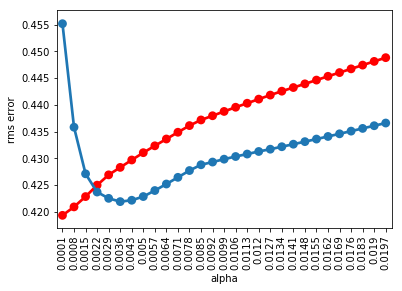

In [164]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
# fig.get_figure().savefig('../images/elastic_alpha.png', dpi = 500)
print("min = ", np.min(ar2))

In [212]:
test_model_8 = sklearn.linear_model.Lasso(copy_X = True, max_iter = 100000, fit_intercept = False, alpha = 0.0029)
test_model_8.fit(training_data, Y['SalePrice'])
print("training error =\t", rmsError(test_model_8.predict(training_data), Y['SalePrice']))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_8.predict(cv_set)))
# print("alpha = ", test_model_8.alpha_)

training error =	 0.4258412892993831
cv error =		 0.4094112031734413


In [217]:
temp = pd.DataFrame()
temp['Id'] = test_data['Id']

In [218]:
temp['SalePrice'] = pd.DataFrame(np.expm1(test_model_8.predict(all_data_dum[len(train_data) : ])))

In [219]:
temp

,Id,SalePrice
0,1461,166237.800574
1,1462,154465.781203
2,1463,164415.864123
3,1464,166964.500849
4,1465,171406.631705
5,1466,152017.018011
6,1467,159842.962153
7,1468,168299.009975
8,1469,163458.575946
9,1470,166691.080581


In [220]:
temp.to_csv('../Output/out.csv', index = False)